<a href="https://colab.research.google.com/github/OlekanmaVictoria/Data-science-Portfolio/blob/main/Copy_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assume that Our client is one of the biggest restaurants in Lagos, Nigeria, Mama Tee Restaurant.


The objective of the regression task is to predict the amount of tip (gratuity in Nigeria naira) given to a food server based on total_bill, gender, smoker (whether they smoke in the party or not), day (day of the week for the party), time (time of the day whether for lunch or dinner), and size (size of the party) in Mama Tee restaurant.


Label: The label for this problem is tip.


Features: There are 6 features and they include total bill, gender, smoker, day, time, and size.

In [ ]:
# ! pip install pandas==0.25.3
# ! pip install numpy==1.16.5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
url='https://drive.google.com/file/d/1kcWZPc6ovg_nI98nxziv1S_iVV00Krsk/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
tip = pd.read_csv(url)

In [ ]:
tip.head()

,total_bill,tip,gender,smoker,day,time,size
0,2125.50,360.79,Male,No,Thur,Lunch,1
1,2727.18,259.42,Female,No,Sun,Dinner,5
2,1066.02,274.68,Female,Yes,Thur,Dinner,4
3,3493.45,337.90,Female,No,Sun,Dinner,1
4,3470.56,567.89,Male,Yes,Sun,Lunch,6


In [ ]:
tip.shape

(744, 7)

In [ ]:
ProfileReport(tip)

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,744
Total Missing (%),0.0%
Total size in memory,40.8 KiB
Average record size in memory,56.2 B
Numeric,3
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Relationships with Categorical Variables

### Gender

Text(0, 0.5, 'Amount of tip')

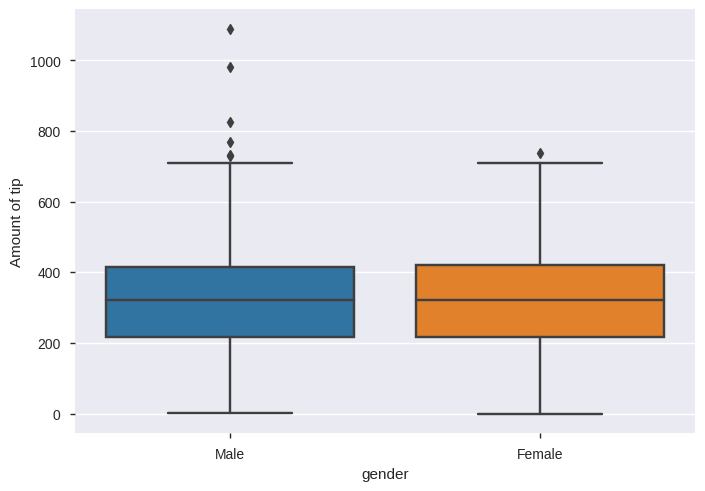

In [ ]:
sns.boxplot(x = 'gender', y = 'tip', data = tip)
plt.ylabel('Amount of tip')

### Smoker

Text(0, 0.5, 'Amount of tip')

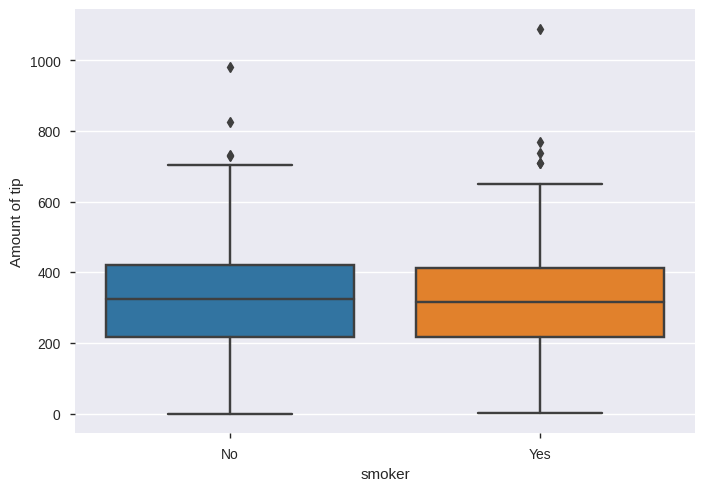

In [ ]:
sns.boxplot(x = 'smoker', y = 'tip', data = tip)
plt.ylabel('Amount of tip')

Smokers and non-smokers gave almost the same amount of tip.

### Time

Text(0, 0.5, 'Amount of tip')

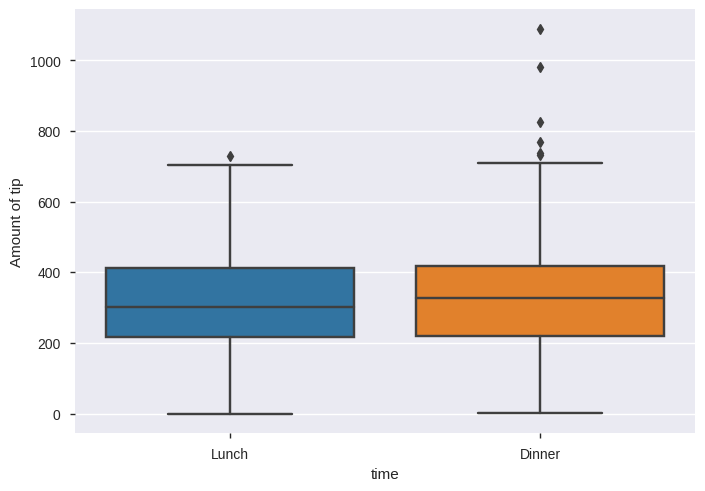

In [ ]:
sns.boxplot(x = 'time', y = 'tip', data = tip)
plt.ylabel('Amount of tip')

Lunch and dinner gave almost the same amount of tip.

## Let's train the model

In [ ]:
from sklearn import metrics #For evaluating the model built
from sklearn.model_selection import train_test_split

## We need to split the data into features and label

In [ ]:
X = tip.drop(["tip"], axis = "columns") 
y = tip["tip"]

In [ ]:
X.head(2)

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5


In [ ]:
X.head()

,total_bill,gender,smoker,day,time,size
0,2125.50,Male,No,Thur,Lunch,1
1,2727.18,Female,No,Sun,Dinner,5
2,1066.02,Female,Yes,Thur,Dinner,4
3,3493.45,Female,No,Sun,Dinner,1
4,3470.56,Male,Yes,Sun,Lunch,6


In [ ]:
y.head()

0    360.79
1    259.42
2    274.68
3    337.90
4    567.89
Name: tip, dtype: float64

#### We need to create a one-hot encoding for all the categorical features in the data because Scikit Learn Linear Regression algorithm cannot work with categorical data directly. 
#### They require all input variables and output variables to be numeric.
#### In this case, we will create a one-hot encoding for gender, smoker, day and time by using `pd.get_dummies()`

In [ ]:
X = pd.get_dummies(X)
X.head()

,total_bill,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tues,day_Wed,time_Dinner,time_Lunch
0,2125.50,1,0,1,1,0,0,0,0,0,1,0,0,0,1
1,2727.18,5,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1066.02,4,1,0,0,1,0,0,0,0,1,0,0,1,0
3,3493.45,1,1,0,1,0,0,0,0,1,0,0,0,1,0
4,3470.56,6,0,1,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
X.shape

(744, 15)

#### We will split our dataset (Features (X) and Label (Y)) into training and test data by using `train_test_split()` function from sklearn. The training set will be 80% while the test set will be 20%. The random_state that is set to 42 is for all of us to have the same set of data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions[:10]

array([290.26334952, 358.33084735, 307.53833356, 372.20644316,
       261.59819814, 331.29716962, 280.98573611, 357.19295063,
       393.1897061 , 295.30471329])

#### Let's compare the actual values and predictions

In [ ]:
comparison = pd.DataFrame({'Actual Values':y_test, 'Predictions':predictions})

In [ ]:
comparison.shape

(149, 2)

In [ ]:
comparison.head(30)

,Actual Values,Predictions
609,436.00,290.263350
539,545.00,358.330847
694,436.00,307.538334
350,378.23,372.206443
174,289.94,261.598198
81,336.81,331.297170
355,468.70,280.985736
424,415.29,357.192951
523,826.22,393.189706
617,163.50,295.304713


In [ ]:
#The error
y_test - predictions

609    145.736650
539    186.669153
694    128.461666
350      6.023557
174     28.341802
          ...    
404     81.174021
69     109.043725
712    556.785369
131    -59.874497
44    -170.429455
Name: tip, Length: 149, dtype: float64

In [ ]:
mse = metrics.mean_squared_error(y_test, predictions)
print("Mean squared error:", round(mse, 3))

rmse = np.sqrt(mse)
print("Root mean squared error:", round(rmse, 3))

Mean squared error: 26860.903
Root mean squared error: 163.893


In [ ]:
print("Maximum tip:", np.max(tip['tip']))
print("Minimum tip:", np.min(tip['tip']))

Maximum tip: 1090.0
Minimum tip: 0.0


Finding the linear regression
Lnear regression is a linera appraoch for modelling the relationship between a scaler reponse or one or more explainatory vaariables.
The case of one explainatory variable is called linear regression.

According to our task;
The lunch and dinner gave almsot the same amount tip(using the boxplot Graph)
Smokers and non-smokers and tip.

The male and Female gave almost the same tip.

There were Smokers in the Party.
The number of smokers in the part were more.
The smokers gave more tip than the none smokers

